In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set()

### Generate data

In [3]:
observations = 10000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10,10,(observations,1))

inputs = np.column_stack((xs,zs))

print(inputs.shape)

(10000, 2)


### Targets

In [4]:
noise = np.random.uniform(-1,1,(observations,1))
targets = 2 * xs - 3 * zs + 5 + noise

print(targets.shape)

(10000, 1)


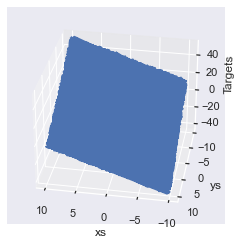

In [5]:
targets = targets.reshape(observations,)
xs = xs.reshape(observations,)
zs = zs.reshape(observations,)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs,zs,targets)
ax.view_init(azim=100)
ax.set_xlabel('xs')
ax.set_ylabel('ys')
ax.set_zlabel('Targets')
plt.show()
targets = targets.reshape(observations,1)

### Initialize variables

In [22]:
init_range = 0.1

weights = np.random.uniform(-init_range, init_range, size=(2,1))

biases = np.random.uniform(-init_range, init_range, size=1)

print(weights, biases)

[[0.09655322]
 [0.06175645]] [-0.07751717]


In [23]:
learning_rate = 0.02

### Train the model

In [24]:
for i in range(1000):
    outputs = np.dot(inputs, weights) + biases
    deltas = outputs - targets
    
    loss = np.sum(deltas ** 2)/2/observations
    
    #print("Loss is " + str(loss))
    
    deltas_scaled = deltas/observations/2
        
    weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled)
    
    biases = biases - learning_rate * np.sum(deltas_scaled)

In [25]:
print(weights, biases)

[[ 2.00044831]
 [-2.99978736]] [4.99998052]
